# Predicting Mercury’s elemental composition from Albedo with MESSENGER Data


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import warnings
warnings.filterwarnings('ignore')
from matplotlib.pyplot import figure
mpl.style.use('classic')
# %matplotlib inline

# from sklearn import metrics
sns.set()

In [7]:
#Step 1 - > Converting all the data frames into Numpy Matrix

# 720*1440
Mercury_top = pd.read_csv("mercury-albedo-top-half.png.csv",header=None);
Mercury_bottom = pd.read_csv("mercury-albedo-resized-bottom-half.png.csv",header=None);

Al =  pd.read_csv("alsimap_smooth_032015.png.csv",header=None);
Mg =  pd.read_csv("mgsimap_smooth_032015.png.csv",header=None);
Ca  =  pd.read_csv("casimap_smooth_032015.png.csv",header=None);
S =  pd.read_csv("ssimap_smooth_032015.png.csv",header=None);
Fe =  pd.read_csv("fesimap_smooth_032015.png.csv",header=None);



mercury_top = Mercury_top.to_numpy()
mercury_bottom = Mercury_bottom.to_numpy()

al = Al.to_numpy() 
fe = Fe.to_numpy()
mg = Mg.to_numpy()
s = S.to_numpy()
ca = Ca.to_numpy()




flat_fe = fe.flatten()
flat_al = al.flatten()
flat_mg = mg.flatten()
flat_s = s.flatten()
flat_ca = ca.flatten()

flat_albedo = mercury_top.flatten()
data_train = {
      
        'Albedo':flat_albedo,'Fe':flat_fe,
        'Al':flat_al,'Mg':flat_mg,'S':flat_s,'Ca':flat_ca
}

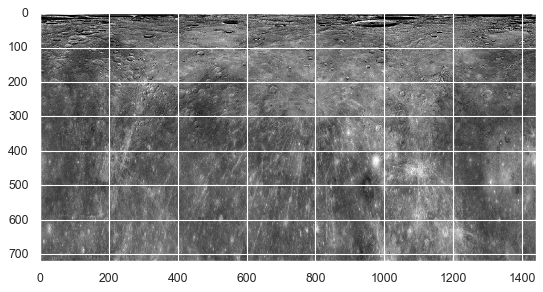

In [8]:
#Plotting to the original to check if the above conversion of successful

plt.imshow(mercury_top, cmap="gray") 
plt.show()

In [9]:
train =  pd.DataFrame(data= data_train)

In [10]:
#Step 3-> Lets do some EDA

train.head()

,Albedo,Fe,Al,Mg,S,Ca
0,0.486275,0.0,0.0,0.0,0.0,0.0
1,0.498039,0.0,0.0,0.0,0.0,0.0
2,0.521569,0.0,0.0,0.0,0.0,0.0
3,0.529412,0.0,0.0,0.0,0.0,0.0
4,0.541176,0.0,0.0,0.0,0.0,0.0


In [11]:
#Lets get some insights about the data using info() and describe() methods.

train.describe()

,Albedo,Fe,Al,Mg,S,Ca
count,1.036800e+06,1.036800e+06,1.036800e+06,1.036800e+06,1.036800e+06,1.036800e+06
mean,4.144590e-01,3.138895e-01,7.510351e-01,5.303197e-01,3.859588e-01,4.086300e-01
std,1.165033e-01,2.891811e-01,1.989632e-01,1.432387e-01,2.304556e-01,2.254984e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.372549e-01,0.000000e+00,7.137255e-01,4.980392e-01,3.529412e-01,4.274510e-01
50%,4.039216e-01,4.549020e-01,8.039216e-01,5.411765e-01,4.509804e-01,4.941176e-01
75%,4.862745e-01,5.607843e-01,8.745098e-01,5.803922e-01,5.098040e-01,5.333334e-01
max,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1036800 entries, 0 to 1036799
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   Albedo  1036800 non-null  float64
 1   Fe      1036800 non-null  float64
 2   Al      1036800 non-null  float64
 3   Mg      1036800 non-null  float64
 4   S       1036800 non-null  float64
 5   Ca      1036800 non-null  float64
dtypes: float64(6)
memory usage: 47.5 MB


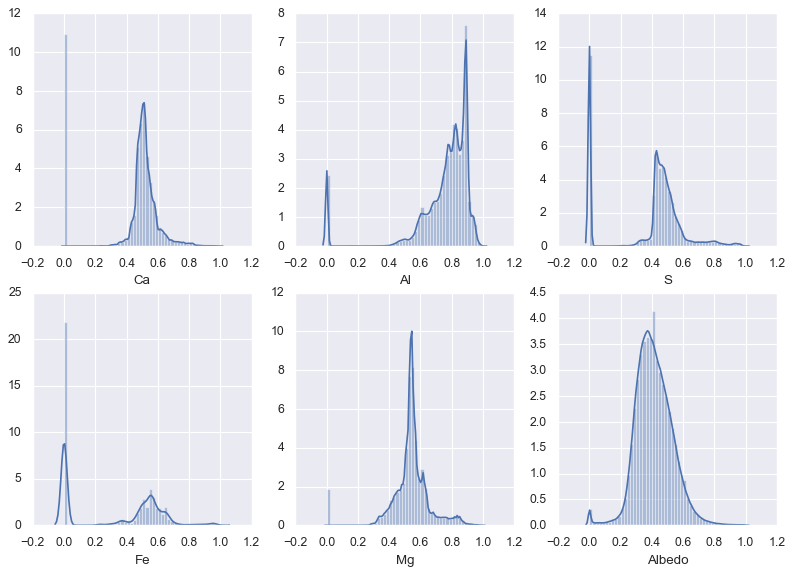

In [13]:
#Let's visualize the chemical compositions and Albedo data


figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')

plt.subplot(2, 3, 1)
sns.distplot(train['Ca'])

plt.subplot(2, 3, 2)
sns.distplot(train['Al'])

plt.subplot(2, 3, 3)
sns.distplot(train['S'])

plt.subplot(2, 3, 4)
sns.distplot(train['Fe'])

plt.subplot(2, 3, 5)
sns.distplot(train['Mg'])

plt.subplot(2, 3, 6)
sns.distplot(train['Albedo'])

In [14]:
#Ingsights from the plots above
#Almost all of the element variables have high no. of zeros indicating missing data. Lets print out the zeros in the chemicals

print("No. of zeros in Al -> ",np.count_nonzero(flat_al==0))
print("No. of zeros in Mg -> ",np.count_nonzero(flat_mg==0))
print("No. of zeros in Fe -> ",np.count_nonzero(flat_fe==0))
print("No. of zeros in S -> ",np.count_nonzero(flat_s==0))
print("No. of zeros in Ca -> ",np.count_nonzero(flat_ca==0))


No. of zeros in Al ->  50809
No. of zeros in Mg ->  39303
No. of zeros in Fe ->  452442
No. of zeros in S ->  238107
No. of zeros in Ca ->  226264


# Fixing Zeros


###### The most intutive way to mix zeros will be using KNN(K-Nearest Neighbours Regressor) to predict the missing region using the data of nearby regions.

#### Replacing zeros with nan

In [28]:
cols = ["Fe","Al","Mg","S","Ca"]
train[cols] = train[cols].astype(object)

#Creating the train data as the the non-missing values and test data the region of missing values for all the elements


df_fe = train[['Albedo','Fe']]
train_df_fe = df_fe.dropna()
test_df_fe = train[train['Fe'].isnull()]

df_al = train[['Albedo','Al']]
train_df_al = df_al.dropna()
test_df_al = train[train['Al'].isnull()]

df_mg = train[['Albedo','Mg']]
train_df_mg = df_mg.dropna()
test_df_mg = train[train['Mg'].isnull()]

df_s = train[['Albedo','S']]
train_df_s = df_s.dropna()
test_df_s = train[train['S'].isnull()]

df_ca = train[['Albedo','Ca']]
train_df_ca = df_ca.dropna()
test_df_ca = train[train['Ca'].isnull()]

In [29]:
#Note - Many instances of using different values of k have been done but all have not been shown

from sklearn import metrics
from sklearn.neighbors import KNeighborsRegressor

In [55]:
error_rate=[]
for i in range(16,30,5):
    
    knn = KNeighborsRegressor(n_neighbors=i,metric='euclidean')
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_train)
    print('k=>',i,' error',metrics.mean_squared_error(pred_i,y_train))
    error_rate.append(metrics.mean_squared_error(pred_i,y_train))

k=> 16  error 0.08812882802493324
k=> 21  error 0.08724238090342852
k=> 26  error 0.08679706969215625


ValueError: x and y must have same first dimension, but have shapes (11,) and (3,)

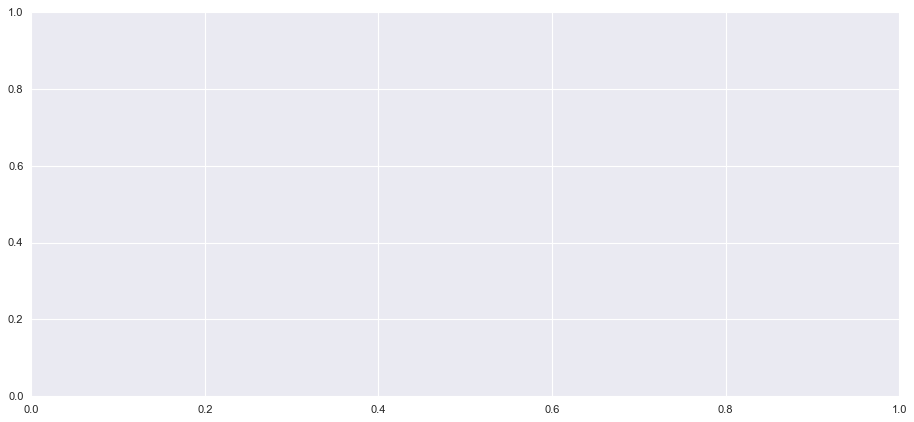

In [57]:
plot_x = [1,6,11,16,16,21,26,30,40,50,60]

plt.figure(figsize=(14,6))
plt.plot(plot_x,error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [34]:
# Fe
X_train =train_df_fe.drop('Fe',axis =1)
y_train = train_df_fe['Fe']
X_test = (test_df_fe['Albedo'].to_numpy()).reshape(test_df_fe['Albedo'].to_numpy().size,1)

knn = KNeighborsRegressor(n_neighbors=25)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
train.loc[train.Fe.isnull(), 'Fe'] = y_pred

# Al

X_train =train_df_al.drop('Al',axis =1)
y_train = train_df_al['Al']
X_test = (test_df_al['Albedo'].to_numpy()).reshape(test_df_al['Albedo'].to_numpy().size,1)


knn = KNeighborsRegressor(n_neighbors=25)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
train.loc[train.Al.isnull(), 'Al'] = y_pred

# Mg

X_train =train_df_mg.drop('Mg',axis =1)
y_train = train_df_mg['Mg']
X_test = (test_df_mg['Albedo'].to_numpy()).reshape(test_df_mg['Albedo'].to_numpy().size,1)

knn = KNeighborsRegressor(n_neighbors=25)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
train.loc[train.Mg.isnull(), 'Mg'] = y_pred

# S
X_train =train_df_s.drop('S',axis =1)
y_train = train_df_s['S']
X_test = (test_df_s['Albedo'].to_numpy()).reshape(test_df_s['Albedo'].to_numpy().size,1)

knn = KNeighborsRegressor(n_neighbors=25)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
train.loc[train.S.isnull(), 'S'] = y_pred


# Ca
X_train =train_df_ca.drop('Ca',axis =1)
y_train = train_df_ca['Ca']
X_test = (test_df_ca['Albedo'].to_numpy()).reshape(test_df_ca['Albedo'].to_numpy().size,1)

knn = KNeighborsRegressor(n_neighbors=25)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
train.loc[train.Ca.isnull(), 'Ca'] = y_pred

ValueError: Found array with 0 sample(s) (shape=(0, 1)) while a minimum of 1 is required.

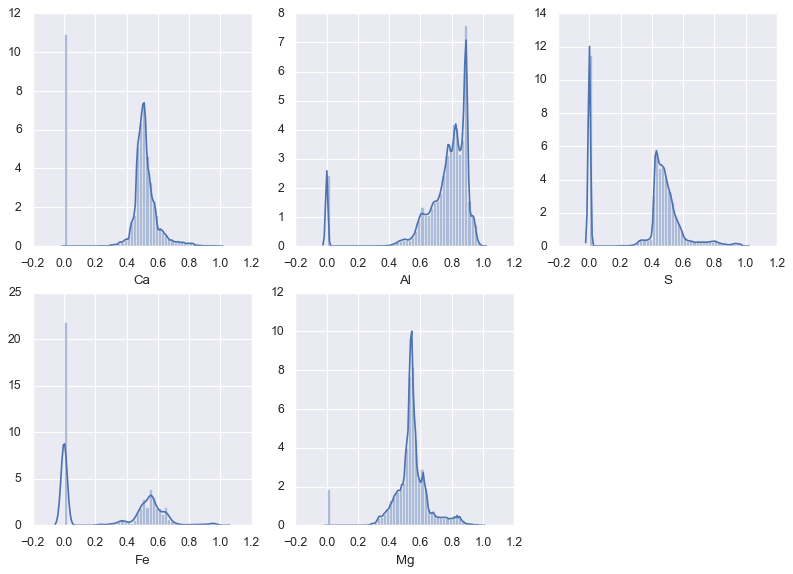

In [21]:
figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')

plt.subplot(2, 3, 1)
sns.distplot(train['Ca'])

plt.subplot(2, 3, 2)
sns.distplot(train['Al'])

plt.subplot(2, 3, 3)
sns.distplot(train['S'])

plt.subplot(2, 3, 4)
sns.distplot(train['Fe'])

plt.subplot(2, 3, 5)
sns.distplot(train['Mg'])

In [22]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1036800 entries, 0 to 1036799
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   Albedo  1036800 non-null  float64
 1   Fe      1036800 non-null  float64
 2   Al      1036800 non-null  float64
 3   Mg      1036800 non-null  float64
 4   S       1036800 non-null  float64
 5   Ca      1036800 non-null  float64
dtypes: float64(6)
memory usage: 47.5 MB


In [23]:
train.describe()

,Albedo,Fe,Al,Mg,S,Ca
count,1.036800e+06,1.036800e+06,1.036800e+06,1.036800e+06,1.036800e+06,1.036800e+06
mean,4.144590e-01,3.138895e-01,7.510351e-01,5.303197e-01,3.859588e-01,4.086300e-01
std,1.165033e-01,2.891811e-01,1.989632e-01,1.432387e-01,2.304556e-01,2.254984e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.372549e-01,0.000000e+00,7.137255e-01,4.980392e-01,3.529412e-01,4.274510e-01
50%,4.039216e-01,4.549020e-01,8.039216e-01,5.411765e-01,4.509804e-01,4.941176e-01
75%,4.862745e-01,5.607843e-01,8.745098e-01,5.803922e-01,5.098040e-01,5.333334e-01
max,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [24]:
train.corr()

,Albedo,Fe,Al,Mg,S,Ca
Albedo,1.000000,-0.045356,0.101683,0.084904,-0.024850,0.002648
Fe,-0.045356,1.000000,0.355446,0.307113,0.565331,0.549103
Al,0.101683,0.355446,1.000000,0.399451,0.344053,0.417360
Mg,0.084904,0.307113,0.399451,1.000000,0.515704,0.462453
S,-0.024850,0.565331,0.344053,0.515704,1.000000,0.935043
Ca,0.002648,0.549103,0.417360,0.462453,0.935043,1.000000


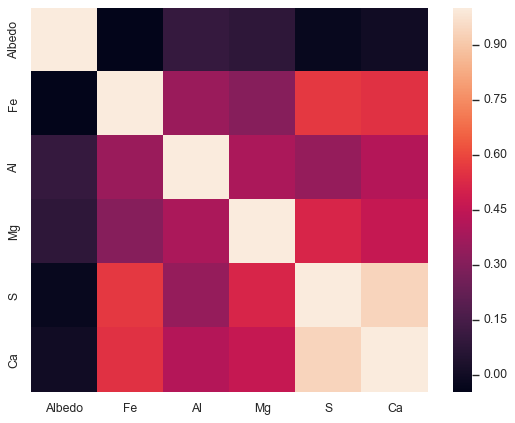

In [25]:
sns.heatmap(train.corr())

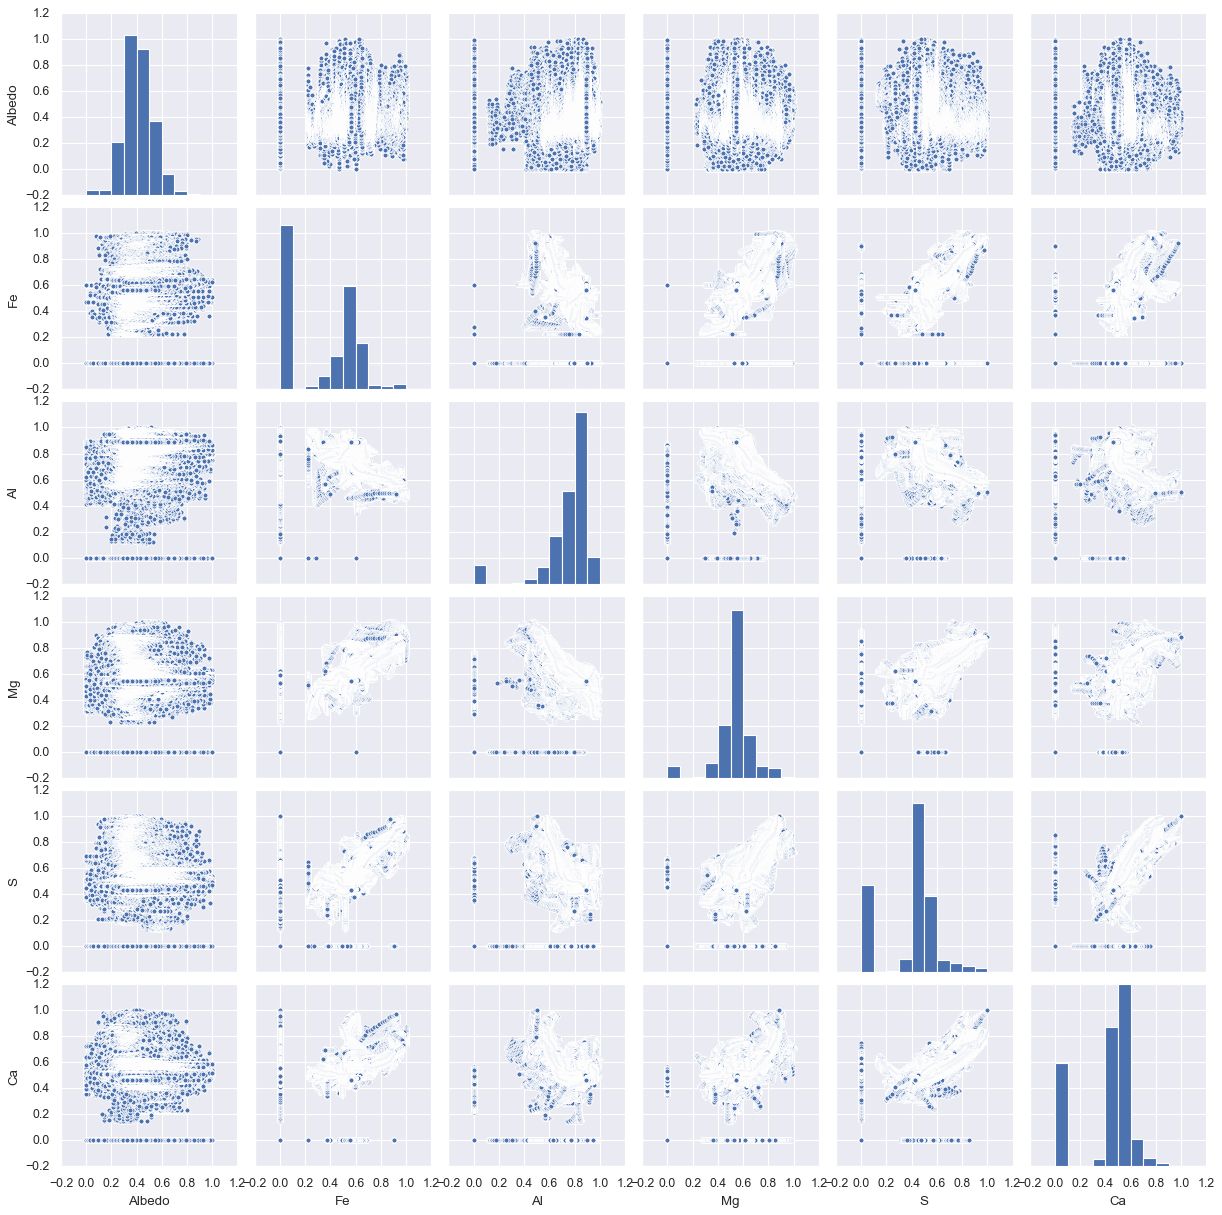

In [26]:
sns.pairplot(train)

# Ingsights from the plots above

1) Some of the variables are heavly skewed.

2) Little correlation can be obeserved among the dependent variables(which may not be useful for some of the models), and negligible correlation between albedo and chemical composition can be seen.

3) Due to the reasons mentioned above we cant expect very accurate and robust model



# Multi Output Regression
In multioutput regression, typically the outputs are dependent upon the input and upon each other. This means that often the outputs are not independent of each other and may require a model that predicts both outputs together or each output contingent upon the other outputs.

Some regression machine learning algorithms support multiple outputs directly.

This includes most of the popular machine learning algorithms implemented in the scikit-learn library, such as:

LinearRegression
KNeighborsRegressor
RandomForestRegressor
I will try the above models and I will also use the wrapper models such as Direct Multioutput Regression and Chained Multioutput Regression to check if XGboost, which gave good results previously, works well or not. At last I will use a more intuitive neural network model with 5 outputs and then use the bes model to predict for lower half of mercury albedo

For all the models these two steps will be followed :-

1) Fitting the regressor object on the hyperparameters obtained using GridSearch

2) Print the details about the evaluation metrics

Note the final peformace would be compared using Mean Square Error(MSE) as its a good evaluation metric for regression model



In [23]:
X = train.iloc[:, 0:1].values
y = train.iloc[:, 1:].values


from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
sc_y = StandardScaler()
X_train = sc_X.fit_transform(X.reshape(X.shape[0],1))
y_train =  sc_y.fit_transform(y)

In [60]:
#Linear Regression

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_train)

print('MAE:', metrics.mean_absolute_error(sc_y.inverse_transform(y_train), sc_y.inverse_transform(y_pred)))
print('MSE:', metrics.mean_squared_error(sc_y.inverse_transform(y_train), sc_y.inverse_transform(y_pred)))
print('RMSE:', np.sqrt(metrics.mean_squared_error(sc_y.inverse_transform(y_train), sc_y.inverse_transform(y_pred))))


MAE: 0.16969612770922382
MSE: 0.0493852192423984
RMSE: 0.22222785433513595


#  KNN

In [61]:

!pip install KNeighboursRegressor
from sklearn.neighbors import KNeighborsRegressor
error_rate=[]
for i in range(1,30,2):
    
    knn = KNeighborsRegressor(n_neighbors=i,metric='euclidean')
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_train)
    print('k=>',i,' error',metrics.mean_squared_error(pred_i,y_train))
    error_rate.append(metrics.mean_squared_error(pred_i,y_train))


ERROR: Could not find a version that satisfies the requirement KNeighboursRegressor (from versions: none)
ERROR: No matching distribution found for KNeighboursRegressor


k=> 1  error 2.184374232946872
k=> 3  error 1.333497379138232
k=> 5  error 1.224230410936036
k=> 7  error 1.1642886779298178
k=> 9  error 1.116970379850421
k=> 11  error 1.1013871995249311
k=> 13  error 1.0739739978444232
k=> 15  error 1.0572072373202726
k=> 17  error 1.0401268512487176
k=> 19  error 1.0277888185211488
k=> 21  error 1.015049759955945
k=> 23  error 1.010429942571362
k=> 25  error 1.0031161787506917
k=> 27  error 0.9991183228647094
k=> 29  error 0.9940815288833476


Text(0, 0.5, 'Error Rate')

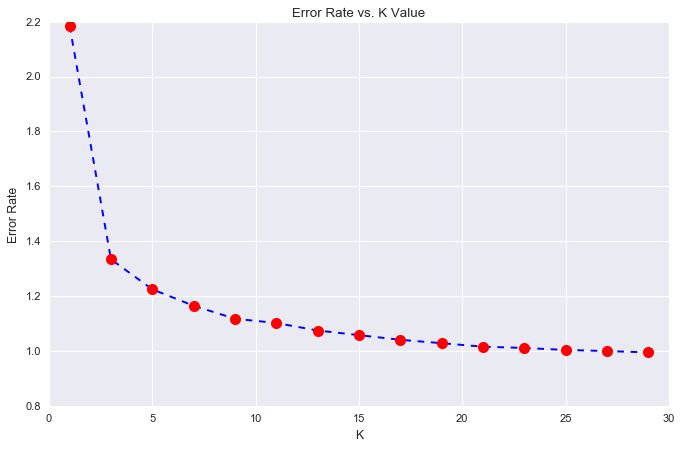

In [62]:
plt.figure(figsize=(10,6))
plt.plot(range(1,30,2),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [63]:
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_train)

print('MAE:', metrics.mean_absolute_error(sc_y.inverse_transform(y_train), sc_y.inverse_transform(y_pred)))
print('MSE:', metrics.mean_squared_error(sc_y.inverse_transform(y_train), sc_y.inverse_transform(y_pred)))
print('RMSE:', np.sqrt(metrics.mean_squared_error(sc_y.inverse_transform(y_train), sc_y.inverse_transform(y_pred))))

MAE: 0.16969612770922382
MSE: 0.0493852192423984
RMSE: 0.22222785433513595


In [69]:
#Random Forest

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor 

param_grid = [
{'n_estimators': [100,100,100],
 'max_depth': [5,10], 
 'max_features' : ['auto', 'sqrt', 'log2'],
'min_samples_leaf':[5,10]


}
]

grid_search_forest = GridSearchCV(regressor, param_grid, cv=2,verbose=5)
grid_search_forest.fit(X_train, y_train)

grid_search_forest.best_params_

Fitting 2 folds for each of 36 candidates, totalling 72 fits
[CV] max_depth=5, max_features=auto, min_samples_leaf=5, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


ValueError: Invalid parameter max_depth for estimator LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False). Check the list of available parameters with `estimator.get_params().keys()`.

In [48]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(max_depth=10,min_samples_leaf=5,n_estimators=10)
error_rate_train=[]

for iter in range(10):
    rf.fit(X_train, y_train)
    y_train_predicted = rf.predict(X_train)
    mse_train = metrics.mean_squared_error(y_train, y_train_predicted)
    error_rate_train.append( metrics.mean_squared_error(y_train, y_train_predicted))
    print("n_estimators: {} Train mse: {} ".format(rf.n_estimators , mse_train))
    rf.n_estimators += 100

error_rate_train

n_estimators: 10 Train mse: 0.07977552030294054 
n_estimators: 110 Train mse: 0.07977437796606113 
n_estimators: 210 Train mse: 0.07977406477018181 
n_estimators: 310 Train mse: 0.07977403791126961 
n_estimators: 410 Train mse: 0.07977410965649483 
n_estimators: 510 Train mse: 0.07977399013465093 
n_estimators: 610 Train mse: 0.07977406731641595 
n_estimators: 710 Train mse: 0.07977407981554832 
n_estimators: 810 Train mse: 0.07977404970563212 
n_estimators: 910 Train mse: 0.07977407938691256 


[0.07977552030294054,
 0.07977437796606113,
 0.07977406477018181,
 0.07977403791126961,
 0.07977410965649483,
 0.07977399013465093,
 0.07977406731641595,
 0.07977407981554832,
 0.07977404970563212,
 0.07977407938691256]

ValueError: x and y must have same first dimension, but have shapes (6,) and (10,)

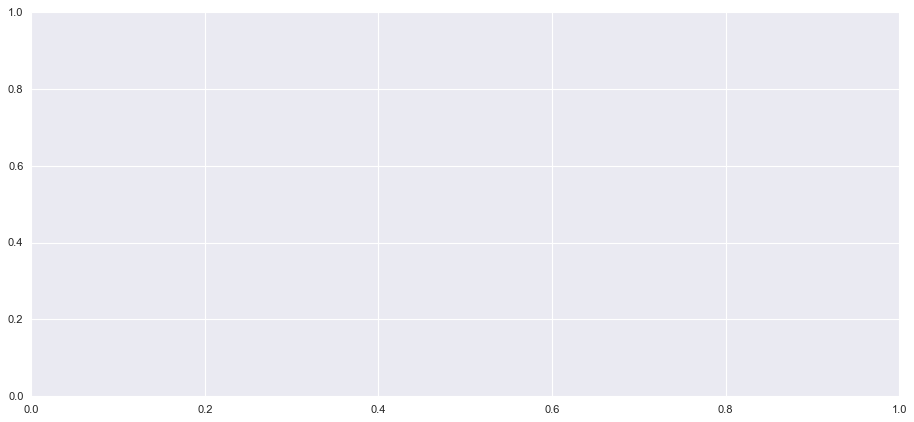

In [54]:
plt.figure(figsize=(14,6))


plt.style.use('seaborn')
plt.plot(range(10,610,100),error_rate_train, label = 'Training error')
#plt.plot(range(100,1200,100),error_rate_test, label = 'Validation error')
plt.ylabel('MSE', fontsize = 14)
plt.xlabel('N_estimators', fontsize = 14)
plt.legend()

In [59]:
regressor = RandomForestRegressor(max_depth=10,min_samples_leaf=5,n_estimators=210) 
 
# fit the regressor with x and y data 
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_train)

print('MAE:', metrics.mean_absolute_error(sc_y.inverse_transform(y_train), sc_y.inverse_transform(y_pred)))
print('MSE:', metrics.mean_squared_error(sc_y.inverse_transform(y_train), sc_y.inverse_transform(y_pred)))
print('RMSE:', np.sqrt(metrics.mean_squared_error(sc_y.inverse_transform(y_train), sc_y.inverse_transform(y_pred))))

MAE: 0.16040761617236346
MSE: 0.0460496631614707
RMSE: 0.21459185250486726


# Xgboost using MultiOutputRegressor wrapper

How normal MultiOutputRegressor works :-

For example, if a multioutput regression problem required the prediction of three values y1, y2 and y3 given an input X, then this could be partitioned into three single-output regression problems:

Problem 1: Given X, predict y1.

Problem 2: Given X, predict y2.

Problem 3: Given X, predict y3.

In [58]:
from sklearn.multioutput import MultiOutputRegressor
regressor=xgboost.XGBRegressor()


wrapper = MultiOutputRegressor(regressor)
wrapper.fit(X_train,y_train)
y_pred = wrapper.predict(X_train)

print('MAE:', metrics.mean_absolute_error(sc_y.inverse_transform(y_train), sc_y.inverse_transform(y_pred)))
print('MSE:', metrics.mean_squared_error(sc_y.inverse_transform(y_train), sc_y.inverse_transform(y_pred)))
print('RMSE:', np.sqrt(metrics.mean_squared_error(sc_y.inverse_transform(y_train), sc_y.inverse_transform(y_pred))))

MAE: 0.16040049621548919
MSE: 0.04604761323853671
RMSE: 0.2145870761218781


In [38]:
import pickle
filename = 'Best_Model_XG_boost.sav'
pickle.dump(regressor, open(filename, 'wb'))

# Xgboost using Chained Multioutput Regression wrapper
How normal Chained MultiOutputRegressor works :-

For example, if a multioutput regression problem required the prediction of three values y1, y2 and y3 given an input X, then this could be partitioned into three dependent single-output regression problems as follows:
###### Problem 1: Given X, predict y1.
###### Problem 2: Given X and yhat1, predict y2.
###### Problem 3: Given X, yhat1, and yhat2, predict y3.

In [57]:
from sklearn.multioutput import RegressorChain
!conda install -c conda-forge xgboost
import xgboost
regressor=xgboost.XGBRegressor()

wrapper =RegressorChain(regressor)
wrapper.fit(X_train,y_train)
y_pred = wrapper.predict(X_train)

print('MAE:', metrics.mean_absolute_error(sc_y.inverse_transform(y_train), sc_y.inverse_transform(y_pred)))
print('MSE:', metrics.mean_squared_error(sc_y.inverse_transform(y_train), sc_y.inverse_transform(y_pred)))
print('RMSE:', np.sqrt(metrics.mean_squared_error(sc_y.inverse_transform(y_train), sc_y.inverse_transform(y_pred))))

Solving environment: ...working... done

# All requested packages already installed.

MAE: 0.16274678386662955
MSE: 0.05224619983675919
RMSE: 0.228574276410884


# Neural Network


In [40]:
!pip install tensorflow
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Activation,Dropout
from tensorflow.keras.models import Model
from tensorflow import keras

In [41]:
def create_model(learn_rate=0.01):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(2))
    model.add(tf.keras.layers.Dense(10))
    model.add(tf.keras.layers.Dense(5))

    opt = keras.optimizers.Adam(learning_rate=learn_rate)
    model.compile(loss='mse', optimizer=opt)
    return model

In [43]:
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasRegressor

model = KerasRegressor(build_fn=create_model,verbose=4)
learn_rate = [0.001,0.01,0.1,1]
batch_size = [32]
epochs = [10]
param_grid = dict(learn_rate=learn_rate,batch_size=batch_size,epochs=epochs)

grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=2,verbose=10)
grid_result = grid.fit(X_train, y_train)

Fitting 2 folds for each of 4 candidates, totalling 8 fits
[CV] batch_size=32, epochs=10, learn_rate=0.001 ......................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Epoch 1/10
Epoch 2/10
Epoch 3/10
Epoch 4/10
Epoch 5/10
Epoch 6/10
Epoch 7/10
Epoch 8/10
Epoch 9/10
Epoch 10/10
[CV]  batch_size=32, epochs=10, learn_rate=0.001, score=-2.213, total= 1.3min
[CV] batch_size=32, epochs=10, learn_rate=0.001 ......................
Epoch 1/10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.3min remaining:    0.0s


Epoch 2/10
Epoch 3/10
Epoch 4/10
Epoch 5/10
Epoch 6/10
Epoch 7/10
Epoch 8/10
Epoch 9/10
Epoch 10/10
[CV]  batch_size=32, epochs=10, learn_rate=0.001, score=-0.942, total= 1.4min
[CV] batch_size=32, epochs=10, learn_rate=0.01 .......................
Epoch 1/10


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  2.7min remaining:    0.0s


Epoch 2/10
Epoch 3/10
Epoch 4/10
Epoch 5/10
Epoch 6/10
Epoch 7/10
Epoch 8/10
Epoch 9/10
Epoch 10/10
[CV]  batch_size=32, epochs=10, learn_rate=0.01, score=-2.193, total= 1.3min
[CV] batch_size=32, epochs=10, learn_rate=0.01 .......................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  4.0min remaining:    0.0s


Epoch 1/10
Epoch 2/10
Epoch 3/10
Epoch 4/10
Epoch 5/10
Epoch 6/10
Epoch 7/10
Epoch 8/10
Epoch 9/10
Epoch 10/10
[CV]  batch_size=32, epochs=10, learn_rate=0.01, score=-0.957, total= 1.3min
[CV] batch_size=32, epochs=10, learn_rate=0.1 ........................
Epoch 1/10


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  5.3min remaining:    0.0s


Epoch 2/10
Epoch 3/10
Epoch 4/10
Epoch 5/10
Epoch 6/10
Epoch 7/10
Epoch 8/10
Epoch 9/10
Epoch 10/10
[CV]  batch_size=32, epochs=10, learn_rate=0.1, score=-2.166, total= 1.3min
[CV] batch_size=32, epochs=10, learn_rate=0.1 ........................
Epoch 1/10


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  6.6min remaining:    0.0s


Epoch 2/10
Epoch 3/10
Epoch 4/10
Epoch 5/10
Epoch 6/10
Epoch 7/10
Epoch 8/10
Epoch 9/10
Epoch 10/10
[CV]  batch_size=32, epochs=10, learn_rate=0.1, score=-1.187, total= 1.3min
[CV] batch_size=32, epochs=10, learn_rate=1 ..........................
Epoch 1/10


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:  7.9min remaining:    0.0s


Epoch 2/10
Epoch 3/10
Epoch 4/10
Epoch 5/10
Epoch 6/10
Epoch 7/10
Epoch 8/10
Epoch 9/10
Epoch 10/10
[CV]  batch_size=32, epochs=10, learn_rate=1, score=-2.326, total= 1.4min
[CV] batch_size=32, epochs=10, learn_rate=1 ..........................
Epoch 1/10


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:  9.2min remaining:    0.0s


Epoch 2/10
Epoch 3/10
Epoch 4/10
Epoch 5/10
Epoch 6/10
Epoch 7/10
Epoch 8/10
Epoch 9/10
Epoch 10/10
[CV]  batch_size=32, epochs=10, learn_rate=1, score=-0.986, total= 1.4min


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed: 10.6min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed: 10.6min finished


Epoch 1/10
Epoch 2/10
Epoch 3/10
Epoch 4/10
Epoch 5/10
Epoch 6/10
Epoch 7/10
Epoch 8/10
Epoch 9/10
Epoch 10/10


In [45]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: -1.574849 using {'batch_size': 32, 'epochs': 10, 'learn_rate': 0.01}


In [46]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(2))
model.add(tf.keras.layers.Dense(10))
model.add(tf.keras.layers.Dense(5))
opt = keras.optimizers.Adam(learning_rate=0.001)

model.compile(optimizer='AdaGrad', loss='mse')
# This builds the model for the first time:
history  = model.fit(X_train, y_train, batch_size=32, epochs=10)

Epoch 1/10
32400/32400 [==============================] - 19s 573us/step - loss: 1.0005
Epoch 2/10
32400/32400 [==============================] - 18s 557us/step - loss: 0.9956
Epoch 3/10
32400/32400 [==============================] - 18s 552us/step - loss: 0.9954
Epoch 4/10
32400/32400 [==============================] - 19s 573us/step - loss: 0.9954
Epoch 5/10
32400/32400 [==============================] - 19s 573us/step - loss: 0.9943
Epoch 6/10
32400/32400 [==============================] - 18s 570us/step - loss: 0.9947
Epoch 7/10
32400/32400 [==============================] - 19s 575us/step - loss: 0.9955
Epoch 8/10
32400/32400 [==============================] - 19s 579us/step - loss: 0.9940
Epoch 9/10
32400/32400 [==============================] - 19s 575us/step - loss: 0.9955
Epoch 10/10
32400/32400 [==============================] - 19s 582us/step - loss: 0.9939


In [47]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (32, 2)                   4         
_________________________________________________________________
dense_28 (Dense)             (32, 10)                  30        
_________________________________________________________________
dense_29 (Dense)             (32, 5)                   55        
Total params: 89
Trainable params: 89
Non-trainable params: 0
_________________________________________________________________


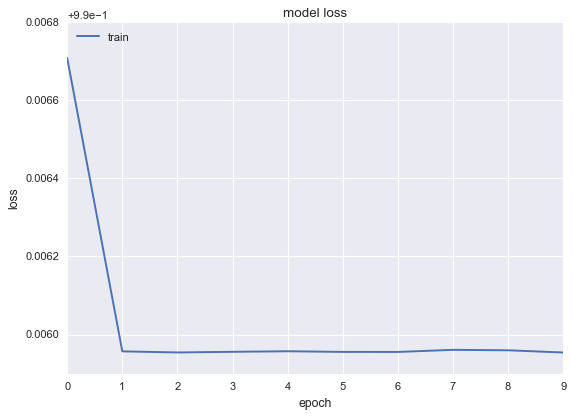

In [48]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [54]:
import sklearn.metrics as metrics
y_pred = model.predict(X_train)

print('MAE:', metrics.mean_absolute_error(sc_y.inverse_transform(y_train), sc_y.inverse_transform(y_pred)))
print('MSE:', metrics.mean_squared_error(sc_y.inverse_transform(y_train), sc_y.inverse_transform(y_pred)))
print('RMSE:', np.sqrt(metrics.mean_squared_error(sc_y.inverse_transform(y_train), sc_y.inverse_transform(y_pred))))


MAE: 0.16969917412352442
MSE: 0.04938523022003832
RMSE: 0.2222278790341984


# Sklearn's - Neural Network Regressor(MLPRegressor)


In [50]:
from sklearn.neural_network import MLPRegressor
regressor = MLPRegressor().fit(X_train, y_train)
y_pred = regressor.predict(X_train)


In [51]:
import sklearn.metrics as metrics
print('MAE:', metrics.mean_absolute_error(sc_y.inverse_transform(y_train), sc_y.inverse_transform(y_pred)))
print('MSE:', metrics.mean_squared_error(sc_y.inverse_transform(y_train), sc_y.inverse_transform(y_pred)))
print('RMSE:', np.sqrt(metrics.mean_squared_error(sc_y.inverse_transform(y_train), sc_y.inverse_transform(y_pred))))

MAE: 0.16059327403737073
MSE: 0.0460977998711275
RMSE: 0.21470398196383667


#  Final Results
The lowest MSE obtained was with the tuned XGBOOST model

MSE = 0.007991978600932065

#### Predicting for bottom half using this model 

In [52]:
from sklearn.multioutput import RegressorChain
import xgboost
regressor=xgboost.XGBRegressor()
wrapper =RegressorChain(regressor)
wrapper.fit(X_train,y_train)

bottom_albedo = mercury_bottom.flatten()

test_predictions  = wrapper.predict(bottom_albedo.reshape(1036800,1))

In [53]:
test_final  = pd.DataFrame(sc_y.inverse_transform(test_predictions), columns = ['Fe','Al','Mg','S','Ca'])

test_final.head()

,Fe,Al,Mg,S,Ca
0,0.311038,0.818740,0.499021,0.467187,0.505842
1,0.307719,0.821952,0.501490,0.471599,0.508550
2,0.299610,0.811316,0.480175,0.371925,0.463273
3,0.307719,0.821952,0.501490,0.471599,0.508550
4,0.311038,0.818740,0.499021,0.467187,0.505842


# Insights

#### Again as Expected XGboost with Multioutput Regression wrapper peformed fairly well.
#### The results were not as good as compared to the MOON model
#### Very low relation between albedo and compostion may be a reason. Also, extenstive hyperparater tuning couldnt be done due to lack of time and computational power